<h1><center>
    ECE 438 - Laboratory 6b<br/>
    Discrete Fourier Transform and Fast Fourier Transform Algorithms (Week 2)<br/>
    <small>Last updated on February 27, 2022</small><br/>
    <br/>
    Date:<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of the frequency range of DFT and effects of zero-padding (50 pts)**: *DFT and DTFT plots, Python code (DTFTsamples), questions*||||
|**Implementation of Divide-and-Conquer DFT and FFT (50 pts)**: *Python codes (dcDFT, fft2, fft4, fft8, fft_stages), questions*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import DTFT, DFTsum, hamming

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1: Shifting the Frequency Range</left></h3>

**1. Create a Hamming window ```x``` of length ```N = 20```, using the provided function `hamming()`, then compute the 20 point DFT of `x` using the provided function `DFTsum()`, and finally, plot the magnitude of the DFT, $|X_{20}(k)|$, versus the index $k$.**

<StemContainer object of 3 artists>

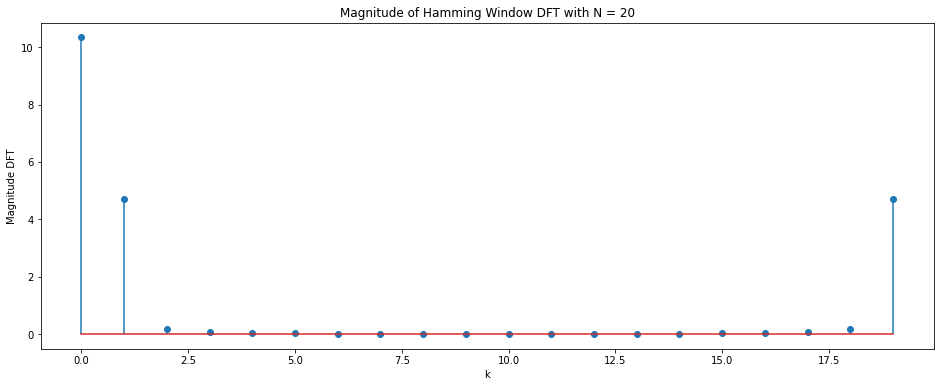

In [4]:
# insert your code here
N = 20
hamm_window = hamming(N)
hamm_window_dft = DFTsum(hamm_window)

plt.title("Magnitude of Hamming Window DFT with N = 20")
plt.ylabel("Magnitude DFT")
plt.xlabel("k")
plt.stem(np.abs(hamm_window_dft))
plt.show()



**2. Complete the function `DTFTsamples` below to compute the samples of the DTFT and their corresponding frequencies.**

**Note:** Your function ```DTFTsamples(x)``` should call your function `DFTsum()` and use the function ```np.fft.fftshift()```.

In [25]:
def DTFTsamples(x):
    """
    Compute samples of the DTFT and their corresponding frequencies in the range -np.pi to np.pi
    
    Parameters:
    ---
    x: an N-point vector
    
    Returns:
    ---
    X: the length N vector of DTFT samples
    w: he length N vector of corresponding radial frequencies
    """
    N = len(x)
    k = np.arange(N)

    X = DFTsum(x)
    w = 2 * np.pi * k / N
    w[w >= np. pi] = w[w >= np.pi] - 2 * np.pi

    X = np.fft.fftshift(X)
    w = np.fft.fftshift(w)
    
    return X, w

**3. Use your function ```DTFTsamples``` to compute DTFT samples of the Hamming window of length $N = 20$. Plot the magnitude of these DTFT samples versus frequency in rad/sample.**

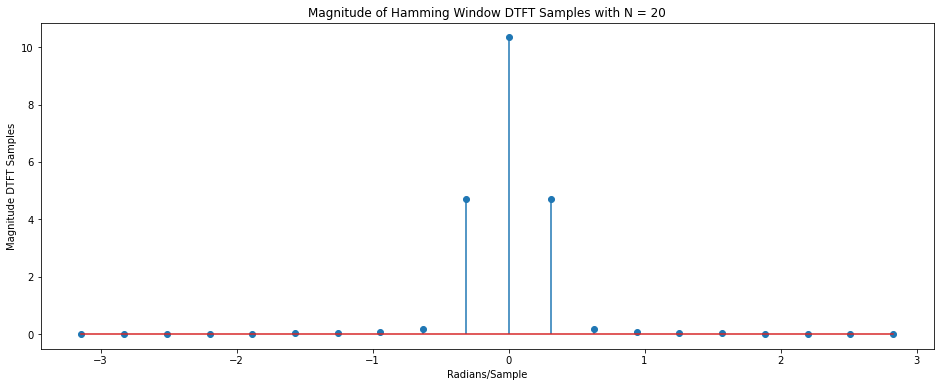

In [29]:
# insert your code here
N = 20
hamm_window = hamming(N)
hamm_window_dtft_samples, w_dtft_samples = DTFTsamples(hamm_window)

plt.title("Magnitude of Hamming Window DTFT Samples with N = 20")
plt.ylabel("Magnitude DTFT Samples")
plt.xlabel("Radians/Sample")
plt.stem(w_dtft_samples, np.abs(hamm_window_dtft_samples))
plt.show()


<h3 style="color:red;"><left>Exercise 2.2: Zero Padding</left></h3>

**1. For $N=50$, compute the vector $x$ containing the values $x[0],\dots, x[N − 1]$, then compute the samples of $X[k]$ using your function ```DTFTsamples()```, and finally plot the magnitude of the DTFT samples versus frequency in rad/sample.**

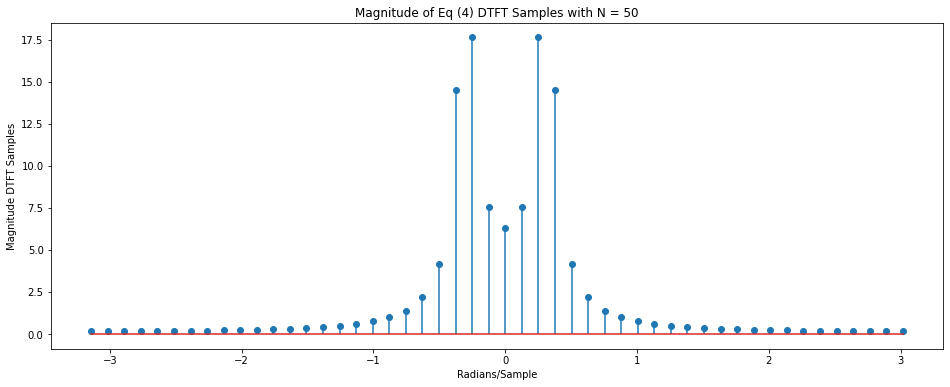

In [33]:
# insert your code here
N = 50
n = np.arange(50)
x_n = np.sin(0.1 * np.pi * n)

x_dtft_samples, w_dtft_samples = DTFTsamples(x_n)

plt.title("Magnitude of Eq (4) DTFT Samples with N = 50")
plt.ylabel("Magnitude DTFT Samples")
plt.xlabel("Radians/Sample")
plt.stem(w_dtft_samples, np.abs(x_dtft_samples))
plt.show()

**2. For $N=100$, compute the vector $x$ containing the values $x[0],\dots, x[N − 1]$, then compute the samples of $X[k]$ using your function ```DTFTsamples()```, and finally plot the magnitude of the DTFT samples versus frequency in rad/sample.**

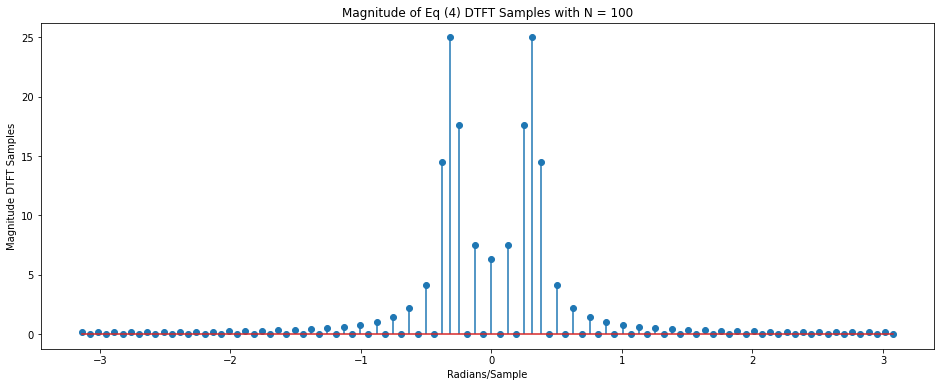

In [34]:
# insert your code here
N = 100
n = np.arange(N)
x_n = np.sin(0.1 * np.pi * n)
x_n[50:100] = 0

x_dtft_samples, w_dtft_samples = DTFTsamples(x_n)

plt.title("Magnitude of Eq (4) DTFT Samples with N = 100")
plt.ylabel("Magnitude DTFT Samples")
plt.xlabel("Radians/Sample")
plt.stem(w_dtft_samples, np.abs(x_dtft_samples))
plt.show()


**3. Which plot looks more like the true DTFT?**

insert your answer here

**3. Explain why the plots look so different.**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.1: Implementation of Divide-and-Conquer DFT</left></h3>

**1. Complete the function `dcDFT` below.**

In [65]:
def dcDFT(x):
    """
    Parameters:
    ---
    x: a vector of even length N
    
    Returns: the DFT of x
    """

    N = len(x)
    k = np.arange(N/2)
    
    # Step 1
    # Separate the samples of x into even and odd points.
    # Hint: The Python function x0 = x[0:N:2] can be used to obtain the “even” points.
    x_even = x[0:N:2]
    x_odd = x[1:N:2]
    
    # Step 2
    # Use your function DFTsum to compute the two N/2 point DFT’s.
    x_even_dft = DFTsum(x_even)
    x_odd_dft = DFTsum(x_odd)
    
    # Step 3
    # Multiply by the twiddle factors$  
    # Step 4
    # Combine the two DFT’s to form X
    twiddle = np.exp(-1j * 2 * np.pi * k / N)
    x_k = x_even_dft + x_odd_dft * twiddle
    x_k_n2 = x_even_dft - x_odd_dft * twiddle
    
    X = np.concatenate((x_k, x_k_n2), axis = 0)

    return X

**2. Test your function ```dcDFT``` by using it to compute and plot the DFT’s of the following signals:**

* $x[n]=\delta[n]$ for $N=10$
* $x[n]=1$ for $N=10$
* $x[n]=e^{j2\pi n/10}$ for $N=10$

**Make sure you plot the results in separate cells.**

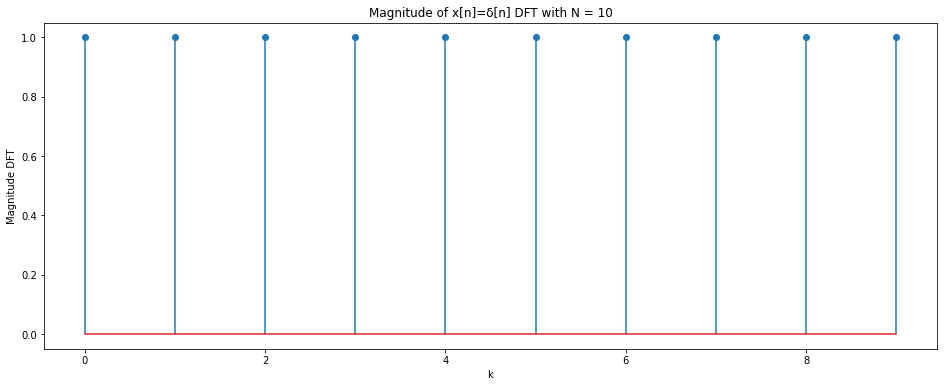

In [66]:
# first signal
N = 10
n = np.linspace(0, N-1, N)
xn = (n == 0).astype(int)
xn_dft = dcDFT(xn)

plt.title("Magnitude of x[n]=δ[n] DFT with N = 10")
plt.ylabel("Magnitude DFT")
plt.xlabel("k")
plt.stem(np.abs(xn_dft))
plt.show()


In [ ]:
# second signal


In [ ]:
# third signal


**3. Determine the number of multiplies that are required in this approach to computing an $N$ point DFT. (Consider a multiply to be one multiplication of real or complex numbers.)**

**Hint:** Refer to the diagram of Figure 1, and remember to consider the $N/2$ point DFTs.

insert your answer here

<h3 style="color:red;"><left>Exercise 3.2: Recursive Divide and Conquer (Part 1)</left></h3>

**1. Complete the Python functions below to compute the $2$, $4$, and $8$-point FFT’s.**

**Note:** The function ```FFT2``` should directly compute the $2$-point DFT using (13), but the functions ```FFT4``` and ```FFT8``` should compute their respective FFT’s using the divide and conquer strategy. This means that ```FFT8``` should call ```FFT4```, and ```FFT4``` should call ```FFT2```.

In [75]:
def FFT2(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 2-point DFT of x
    """

    N = len(x)
    k = np.arange(N/2)
    twiddle = np.exp(-1j * 2 * np.pi * k / N)

    x_even = x[0:N:2]
    x_odd = x[1:N:2]

    X_0 = x_even + x_odd * twiddle
    X_1 = x_even - x_odd * twiddle

    X = np.concatenate((X_0, X_1), axis = 0)
    return X

In [72]:
def FFT4(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 4-point DFT of x
    """
    N = len(x)
    k = np.arange(N/2)
    twiddle = np.exp(-1j * 2 * np.pi * k / N)

    x_even = x[0:N:2]
    x_odd = x[1:N:2]
    
    X_0 = FFT2(x_even) + FFT2(x_odd) * twiddle
    X_1 = FFT2(x_even) - FFT2(x_odd) * twiddle

    X = np.concatenate((X_0, X_1), axis = 0)
    return X

In [71]:
def FFT8(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 8-point DFT of x
    """
    N = len(x)
    k = np.arange(N/2)
    twiddle = np.exp(-1j * 2 * np.pi * k / N)

    x_even = x[0:N:2]
    x_odd = x[1:N:2]
    
    X_0 = FFT4(x_even) + FFT4(x_odd) * twiddle
    X_1 = FFT4(x_even) - FFT4(x_odd) * twiddle

    X = np.concatenate((X_0, X_1), axis = 0)
    return X

**2. Test your function ```FFT8``` by using it to compute the DFT’s of the following signals. Compare these results to the previous ones.**

* $x[n]=\delta[n]$ for $N=8$
* $x[n]=1$ for $N=8$
* $x[n]=e^{j2\pi n/8}$ for $N=8$

**Make sure you plot the results in separate cells.**

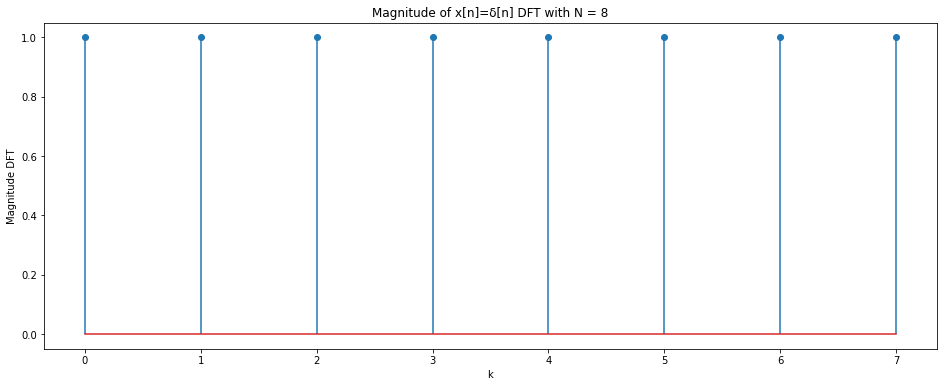

In [74]:
# first signal
N = 8
n = np.linspace(0, N-1, N)
xn = (n == 0).astype(int)
xn_dft = FFT8(xn)

plt.title("Magnitude of x[n]=δ[n] DFT with N = 8")
plt.ylabel("Magnitude DFT")
plt.xlabel("k")
plt.stem(np.abs(xn_dft))
plt.show()


In [ ]:
# second signal


In [ ]:
# third signal


**3. List the output (not plot) of ```FFT8``` for the case $x[n] = 1$ for $N = 8$.**

In [ ]:
# insert your code here


**4. Calculate the total number of multiplies by twiddle factors required for your 8-point FFT. (A multiply is a multiplication by a real or complex number.)**

insert your answer here

**5. Determine a formula for the number of multiplies required for an $N = 2^p$ point FFT. Leave the expression in terms of $N$ and $p$. How does this compare to the number of multiplies required for direct implementation when $p = 10$?**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.3: Recursive Divide and Conquer (Part 2)</left></h3>

**1. Complete the recursive function `fft_stage` below to perform one stage of the FFT algorithm for a power-of-2 length signal.**

**Note:** the body of this function should look very similar to previous functions written in this lab.

In [ ]:
def fft_stage(x):
    """
    Performs one stage of the FFT algorithm for a power-of-2 length signal
    
    Parameters:
    ---
    x: a power-of-2 length signal
    
    Returns:
    ---
    X: the DFT of the inpu signal
    """
    
    # Step 1
    # Determine the length of the input signal.
    
    # Step 2
    # If N == 2, then the function should just compute the 2-pt DFT as in equation (13), and then return.
    
    # Step 3
    # If N > 2, then the function should perform the FFT steps described previously 
    # (i.e. decimate, compute (N/2)-pt DFTs, re-combine), 
    # calling fft_stage(x) to compute the (N/2)-pt DFTs.
    
    X = None
    return X

**2. Test ```fft_stage(x)``` on the three 8-point signals given above, and verify that it returns the same results as ```FFT8(x)```.**

**Make sure you plot the results in separate cells.**

In [ ]:
# first signal


In [ ]:
# second signal


In [ ]:
# third signal


<h2 style="color:salmon;"><left>4. References</left></h2>

[1] J. W. Cooley and J. W. Tukey, “An algorithm for the machine calculation of complex
Fourier series,” Mathematics of Computation, vol. 19, no. 90, p. 297-301, April 1965.